In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import yfinance as yf
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn import preprocessing
from pandas_datareader import data as pdr
import warnings
import numpy as np
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import ta
import rfpimp
from ta import add_all_ta_features
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,mean_absolute_error
from math import sqrt
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV,Lasso
from sklearn.model_selection import cross_val_score
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore') # to supress 
import yfinance as yf
from pandas_datareader import data as pdr
import statsmodels.tsa.stattools as ts
#from statsmodels.tsa.ar_model import AutoReg
from functools import reduce
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
import seaborn as sns
import datetime
import warnings
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
#from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
sns.set()
import pandas_datareader.data as web
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Glo Bii\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Glo Bii\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy import stats
from statsmodels.tsa.stattools import adfuller as adf

In [6]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [9]:
# American= web.DataReader("AAL", data_source='yahoo', start='2000-12-12',
#                     end='2020-12-18')
# American.head()

American= web.DataReader("AAL", data_source='yahoo', start='2000-12-12',
                    end='2020-12-18')
American.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-09-27,21.400000,19.100000,21.049999,19.299999,961200.0,18.194910
2005-09-28,20.530001,19.200001,19.299999,20.500000,5747900.0,19.326199
2005-09-29,20.580000,20.100000,20.400000,20.209999,1078200.0,19.052801
2005-09-30,21.049999,20.180000,20.260000,21.010000,3123300.0,19.806999
2005-10-03,21.750000,20.900000,20.900000,21.500000,1057900.0,20.268938


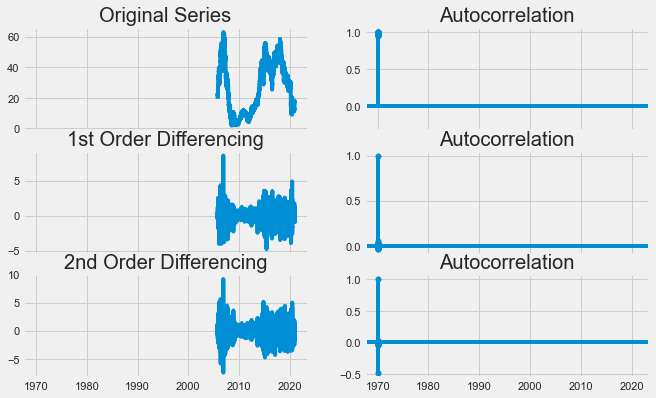

In [10]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(American.Close); axes[0, 0].set_title('Original Series')
plot_acf(American.Close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(American.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(American.Close.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(American.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(American.Close.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

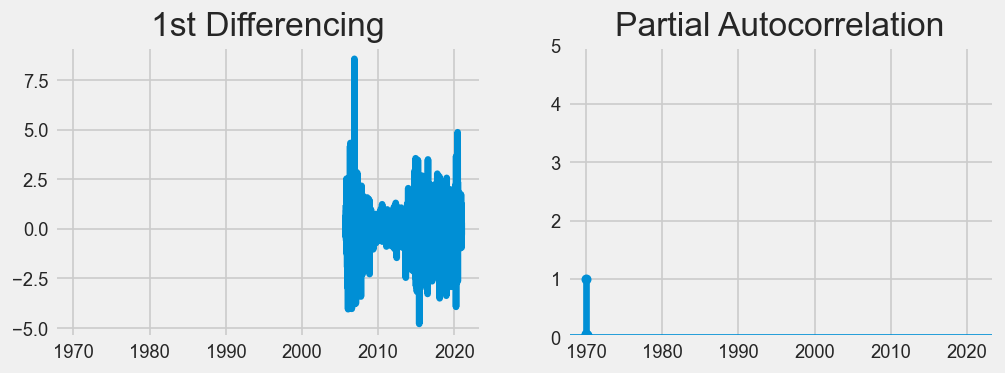

In [11]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(American.Close.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(American.Close.diff().dropna(), ax=axes[1])

plt.show()

In [8]:
CHINA= web.DataReader("CPCAY", data_source='yahoo', start='2000-12-12',
                    end='2020-12-18')
CHINA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-12-12,8.625,8.625,8.625,8.625,1100.0,5.166062
2000-12-13,9.000,8.750,8.750,8.750,600.0,5.240932
2000-12-14,8.750,8.750,8.750,8.750,0.0,5.240932
2000-12-15,8.750,8.750,8.750,8.750,0.0,5.240932
2000-12-18,8.625,8.375,8.625,8.625,4200.0,5.166062


In [6]:
Australia= web.DataReader("QAN.AX", data_source='yahoo', start='2000-12-12',
                    end='2020-12-18')
Australia

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-12-11,4.021802,3.958466,3.979578,3.990134,2804463.0,2.077781
2000-12-12,4.011246,3.863463,3.990134,3.905687,4770808.0,2.033807
2000-12-13,3.884575,3.810684,3.874019,3.863463,2655814.0,2.011820
2000-12-14,3.852907,3.779016,3.852907,3.779016,1649692.0,1.967846
2000-12-17,3.779016,3.736792,3.747348,3.747348,1398294.0,1.951355
...,...,...,...,...,...,...
2020-12-13,5.120000,5.005000,5.100000,5.070000,12419806.0,5.070000
2020-12-14,5.070000,5.000000,5.050000,5.050000,6197095.0,5.050000
2020-12-15,5.165000,5.080000,5.080000,5.090000,7215196.0,5.090000


In [7]:
Germany= web.DataReader("LHA.DE", data_source='yahoo', start='2000-12-12',
                    end='2020-12-18')
Germany

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-12-12,25.950001,24.900000,25.190001,25.500000,1233123.0,14.978963
2000-12-13,25.900000,25.299999,25.799999,25.299999,668714.0,14.861483
2000-12-14,25.850000,24.900000,25.650000,25.030001,1064092.0,14.702880
2000-12-15,25.500000,24.850000,24.870001,24.900000,1983691.0,14.626517
2000-12-18,26.080000,25.150000,25.299999,26.000000,1238924.0,15.272669
...,...,...,...,...,...,...
2020-12-14,9.888000,9.500000,9.502000,9.750000,4155577.0,9.750000
2020-12-15,9.804000,9.586000,9.758000,9.786000,3692324.0,9.786000
2020-12-16,10.140000,9.800000,9.858000,9.876000,4241395.0,9.876000


# AMERICAN AIRLINES

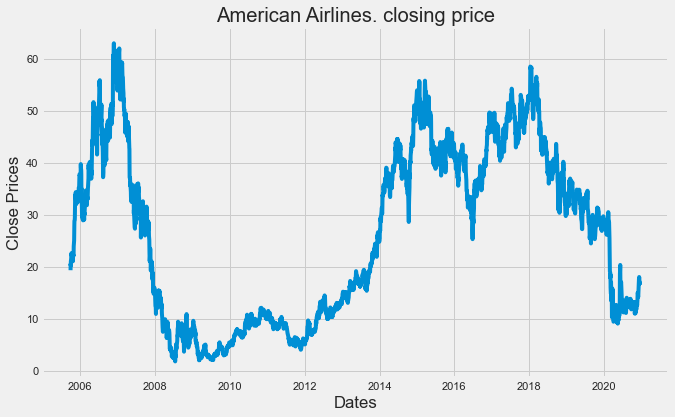

In [8]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(American['Close'])
plt.title('American Airlines. closing price')
plt.show()

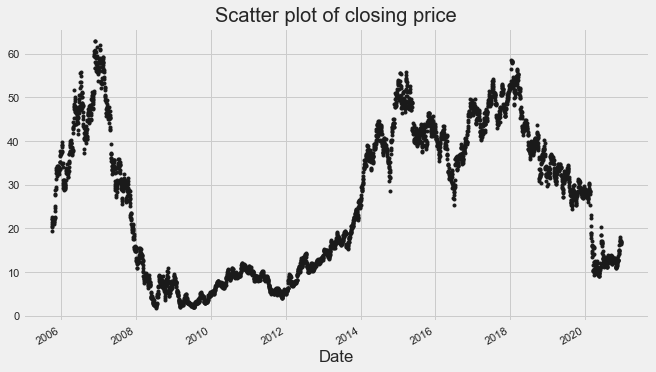

In [9]:
# Scatter plot
df_close = American['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

- **ADF (Augmented Dickey-Fuller) Test**

- The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

- Null Hypothesis: The series has a unit root (value of a =1)

- Alternate Hypothesis: The series has no unit root.

- If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

- If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

- So let''s **check for stationarity:**

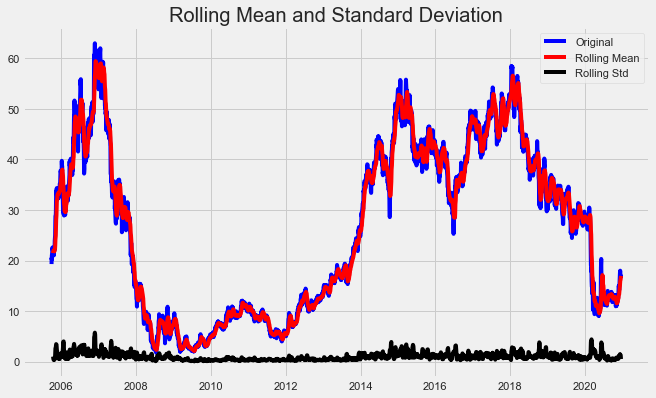

Results of dickey fuller test
Test Statistics                  -1.598353
p-value                           0.484421
No. of lags used                  1.000000
Number of observations used    3833.000000
critical value (1%)              -3.432057
critical value (5%)              -2.862294
critical value (10%)             -2.567172
dtype: float64


In [13]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

-  We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

- In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

- So let us separate Trend and Seasonality from the time series.

<Figure size 720x432 with 0 Axes>

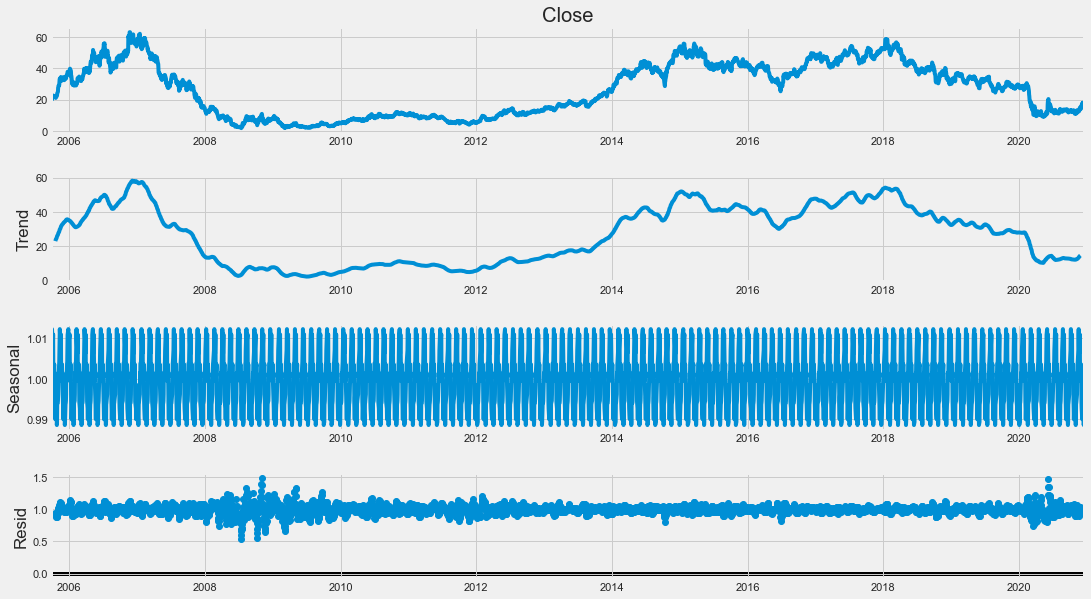

In [14]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

- we start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. 
- Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean
consumption value at every point further ahead in series.

No handles with labels found to put in legend.


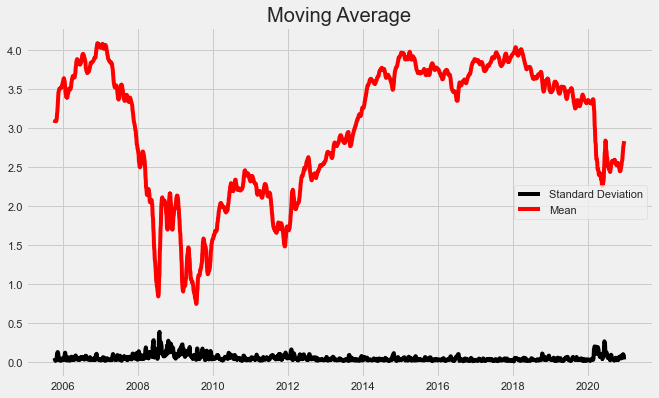

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

- Now we are going to create an ARIMA model and will train it with the closing price of the stock on the train data.
- So let us split the data into training and test set and visualize it.

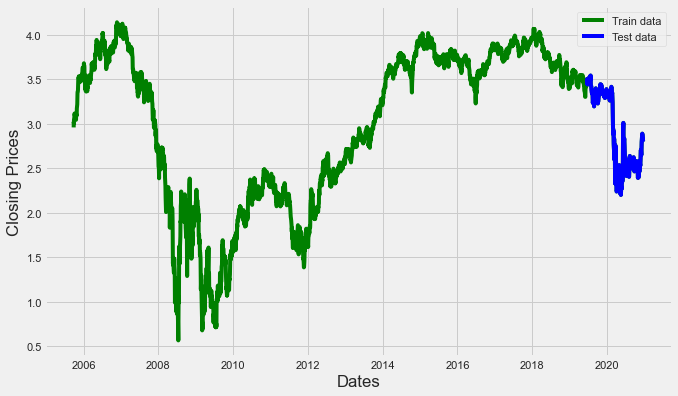

In [16]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

- Its time to choose parameters p,q,d for ARIMA model.
-  we are going to use Auto ARIMA to get the best parameters without even plotting ACF and PACF graphs.

In [17]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-12087.690, Time=21.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12089.525, Time=4.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12089.347, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-12089.655, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-12088.886, Time=1.30 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 28.246 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3448
Model:               SARIMAX(0, 1, 0)   Log Likelihood                6045.828
Date:                Sun, 10 Jan 2021   AIC                         -12089.655
Time:                        15:01:58   BIC                         -12083.510
Sample:                             0   HQIC                        -12087.461
                               - 3448                           

- So the Auto ARIMA model provided the value of p,d, and q as 0,1 and 0 respectively.

# let’s review the residual plots from auto ARIMA

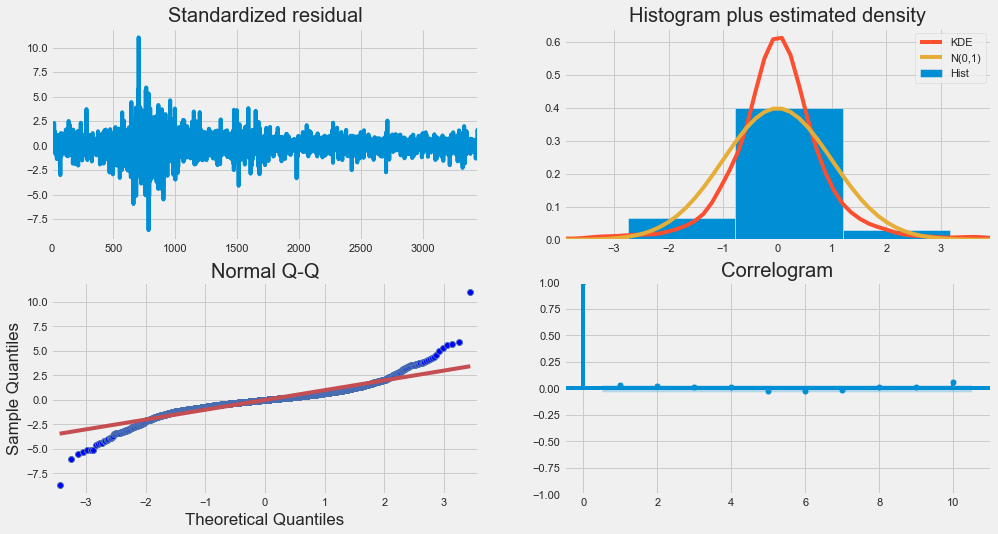

In [19]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

- 1.The residual errors seem to fluctuate around a mean of zero and have a uniform variance
- 2.The density plot suggest normal distribution with mean zero.
- 3.All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed
- 4.The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

In [18]:
# creating an ARIMA model with provided optimal parameters p, d and q.
model = ARIMA(train_data, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 3447
Model:                 ARIMA(0, 1, 0)   Log Likelihood                6045.845
Method:                           css   S.D. of innovations              0.042
Date:                Sun, 10 Jan 2021   AIC                         -12087.690
Time:                        15:33:27   BIC                         -12075.399
Sample:                             1   HQIC                        -12083.300
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.185      0.853      -0.001       0.002


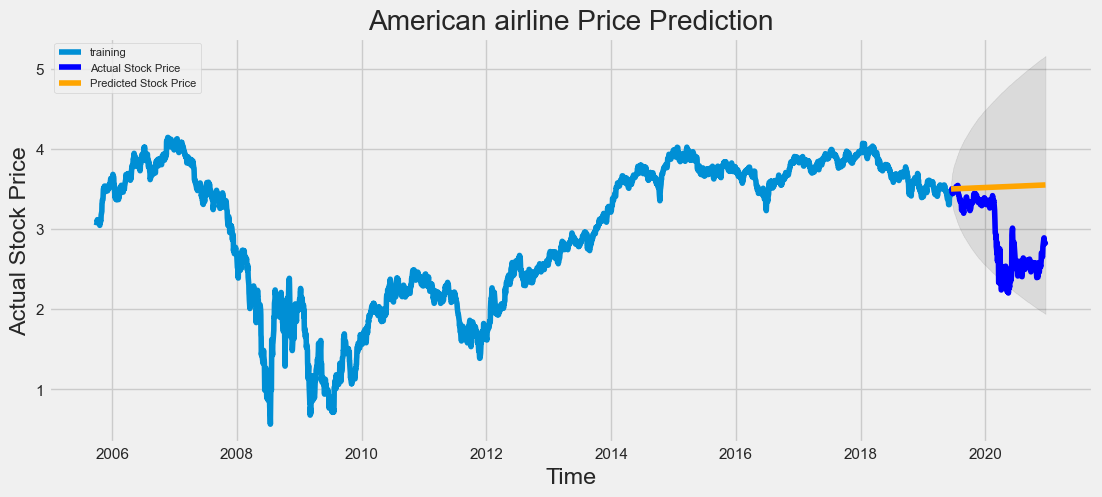

In [19]:
# 95% CI
# Forecast
fc, se, conf = fitted.forecast(384, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('American airline Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [21]:
from sklearn.metrics import r2_score
# report performance
r_squared=r2_score(test_data, fc)
print('R_SQUARED: '+str(r_squared))
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

R_SQUARED: -2.053647376973737
MSE: 0.5560462640596548
MAE: 0.6036878037653365
RMSE: 0.7456850971151662
MAPE: 0.23380159435054174


- Around 23.3% MAPE(Mean Absolute Percentage Error) implies the model is about 77.7% accurate in predicting the test set observations.

# CHINA

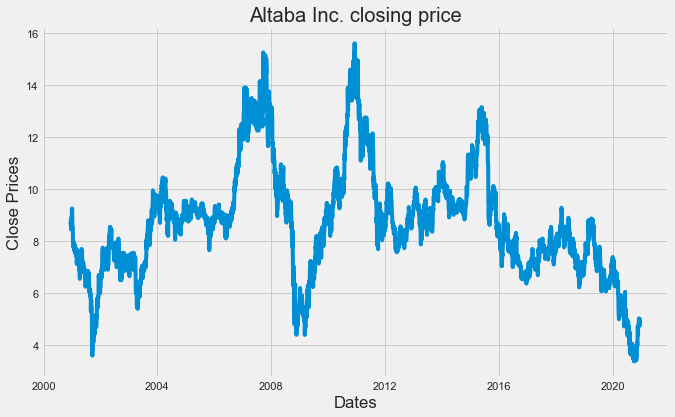

In [22]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(CHINA['Close'])
plt.title('Altaba Inc. closing price')
plt.show()

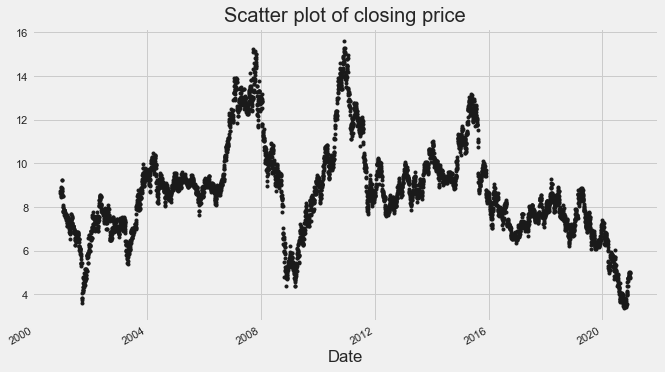

In [23]:
df_close = CHINA['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

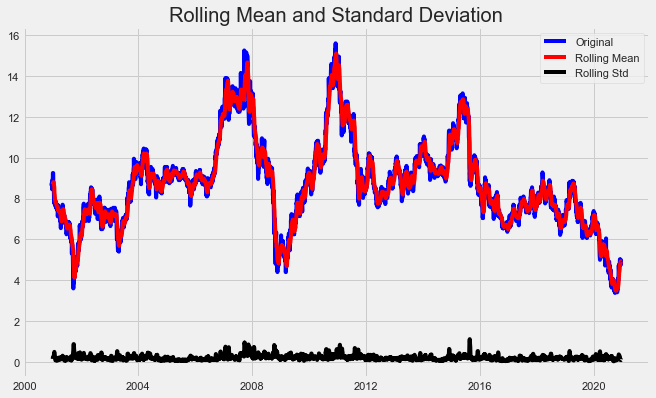

Results of dickey fuller test
Test Statistics                  -2.260769
p-value                           0.184933
No. of lags used                 29.000000
Number of observations used    5007.000000
critical value (1%)              -3.431657
critical value (5%)              -2.862117
critical value (10%)             -2.567077
dtype: float64


In [24]:

#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

- We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. 
- Also, the test statistics is greater than the critical values. so the data is non-stationary.

<Figure size 720x432 with 0 Axes>

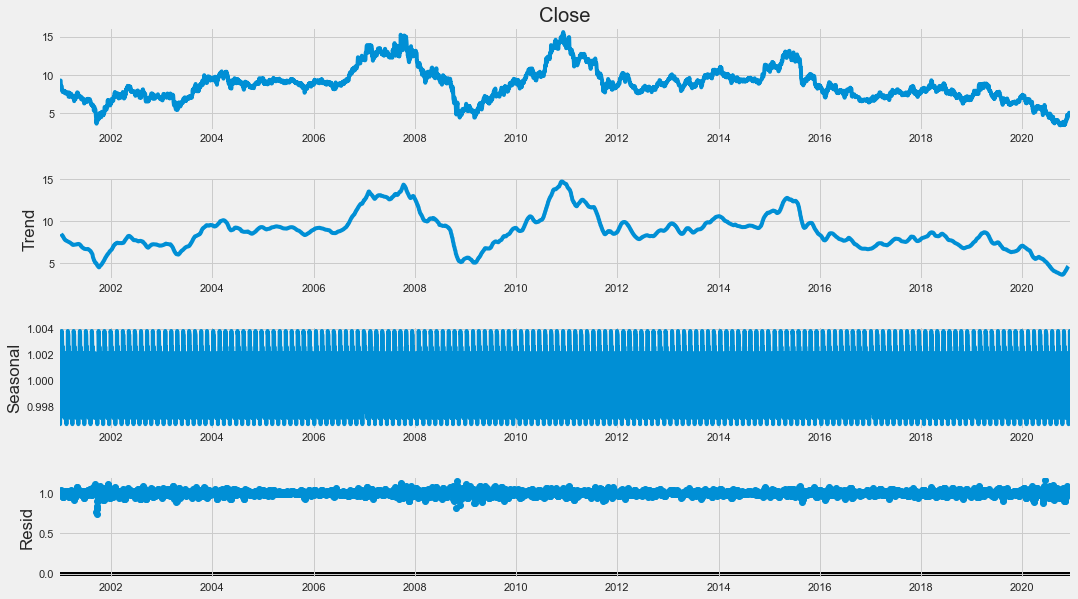

In [25]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


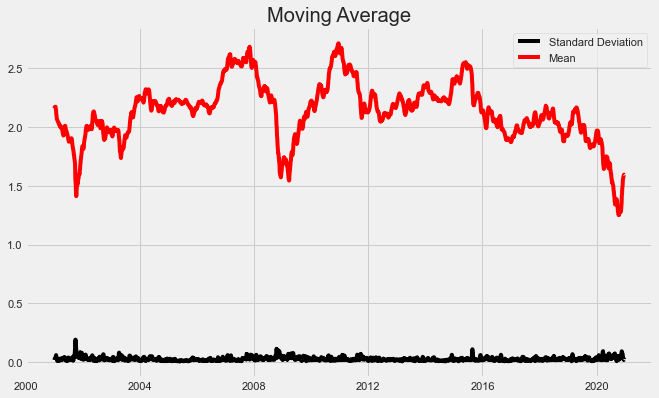

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

- Now we are going to create an ARIMA model and will train it with the closing price of the stock on the train data.
- So let us split the data into training and test set and visualize it.

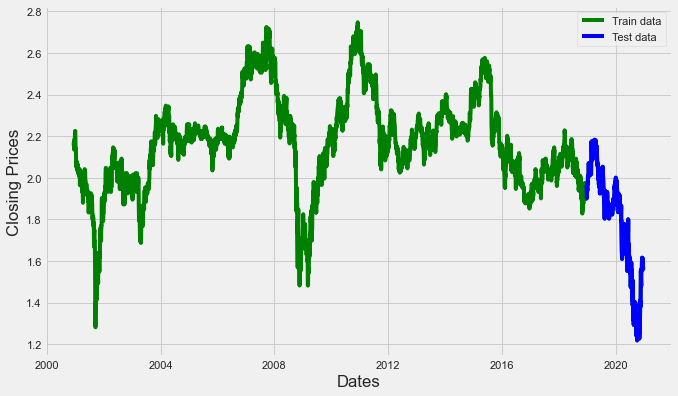

In [27]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

- Its time to choose parameters p,q,d for ARIMA model. Last time we chose the value of p,d, and q by observing the plots of ACF and PACF but now we are going to use Auto ARIMA to get the best parameters without even plotting ACF and PACF graphs.

In [28]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-21200.183, Time=0.78 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-21269.108, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-21278.641, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-21202.162, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-21290.380, Time=2.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-21288.489, Time=3.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-21288.295, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-21289.724, Time=2.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-21286.892, Time=0.63 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-21286.210, Time=1.76 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-21292.345, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-21280.611, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-21271.080, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-21290.455, Time=0.62 sec
 ARIM

- So the Auto ARIMA model provided the value of p,d, and q as 3,1 and 2 respectively.

- Before moving forward, let’s review the residual plots from auto ARIMA.

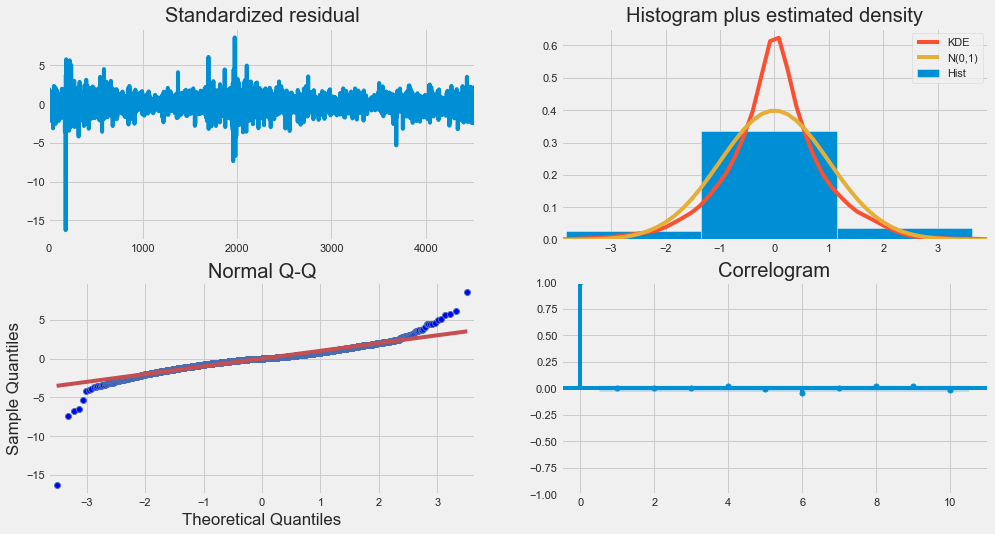

In [29]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [30]:
model = ARIMA(train_data, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4529
Model:                 ARIMA(1, 1, 1)   Log Likelihood               10649.213
Method:                       css-mle   S.D. of innovations              0.023
Date:                Sun, 10 Jan 2021   AIC                         -21290.425
Time:                        15:37:06   BIC                         -21264.752
Sample:                             1   HQIC                        -21281.382
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.085e-05      0.000     -0.188      0.851      -0.001       0.000
ar.L1.D.Close     0.3552      0.087      4.106      0.000       0.186       0.525
ma.L1.D.Close    -0.4908      0.081     

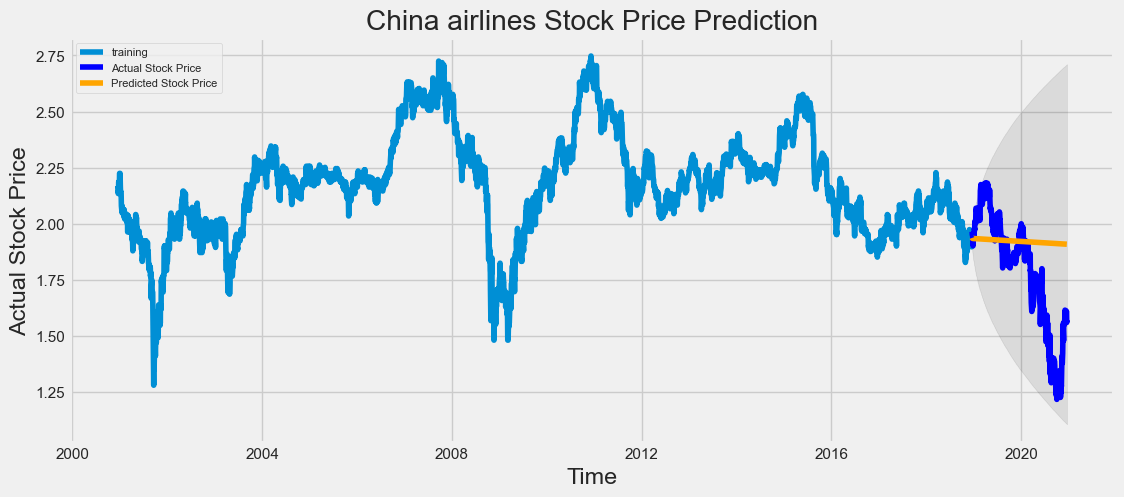

In [31]:
# Forecast
fc, se, conf = fitted.forecast(504, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('China airlines Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [32]:
# report performance
r_squared=r2_score(test_data, fc)
print('R_SQUARED: '+str(r_squared))
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

R_SQUARED: -0.20780108591917945
MSE: 0.07918537502580349
MAE: 0.20819039314832574
RMSE: 0.28139896059829983
MAPE: 0.13456737591430673


# AUSTRALIA

In [33]:
Australia.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

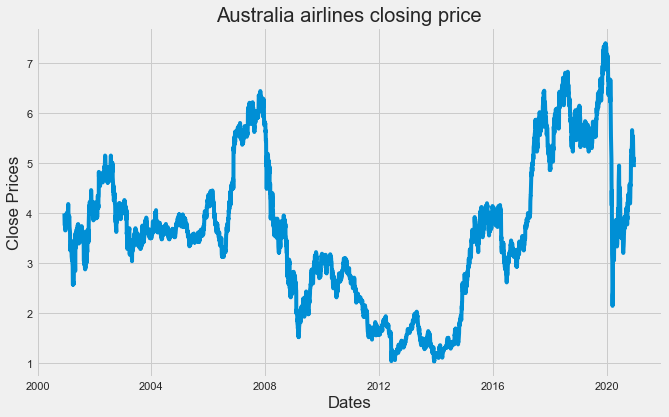

In [34]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(Australia['Close'])
plt.title('Australia airlines closing price')
plt.show()

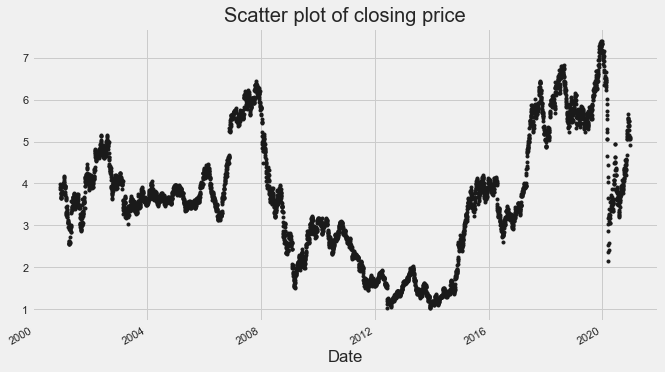

In [35]:
df_close = Australia['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

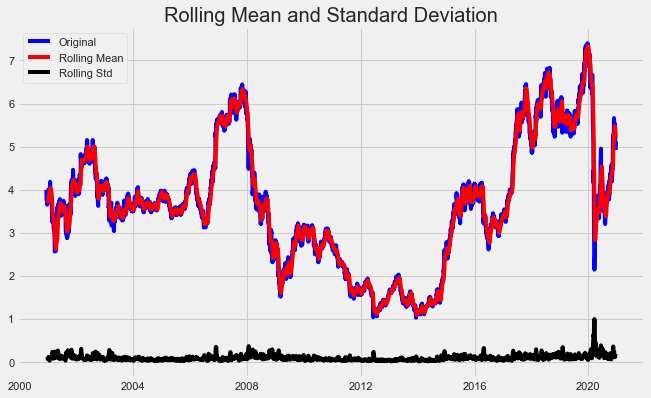

Results of dickey fuller test
Test Statistics                  -2.073950
p-value                           0.255118
No. of lags used                 11.000000
Number of observations used    5056.000000
critical value (1%)              -3.431644
critical value (5%)              -2.862112
critical value (10%)             -2.567074
dtype: float64


In [36]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.



So let us separate Trend and Seasonality from the time series.

<Figure size 720x432 with 0 Axes>

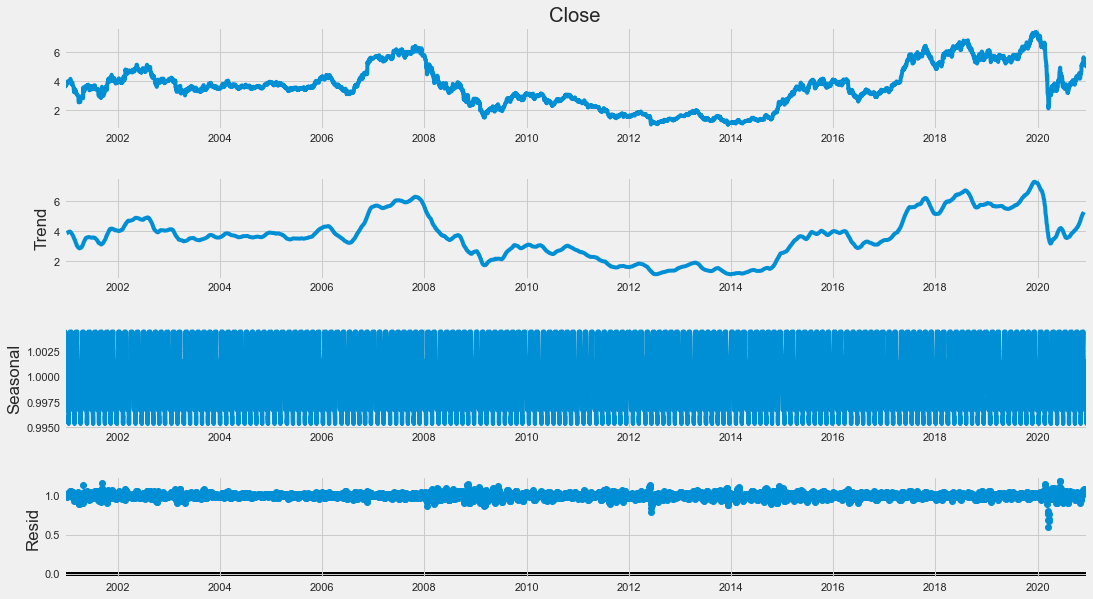

In [37]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

First we take the log of the series to reduce the magnitude of the values and reduce the rising trend in the series.
Then we find the rolling average of the series.
A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

No handles with labels found to put in legend.


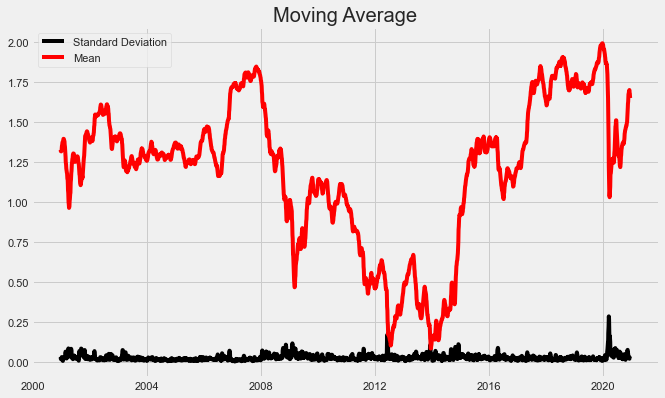

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

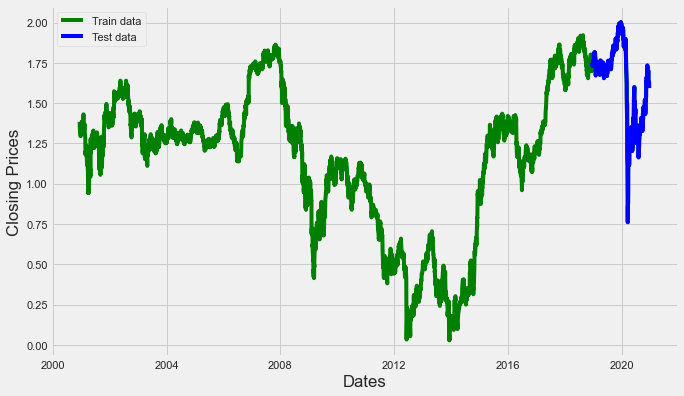

In [39]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [40]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-22249.372, Time=0.54 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-22247.650, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-22247.649, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-22251.281, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-22245.648, Time=2.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.612 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4558
Model:               SARIMAX(0, 1, 0)   Log Likelihood               11126.640
Date:                Sun, 10 Jan 2021   AIC                         -22251.281
Time:                        15:38:24   BIC                         -22244.856
Sample:                             0   HQIC                        -22249.018
                               - 4558                             

In [41]:
model = ARIMA(train_data, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4557
Model:                 ARIMA(0, 1, 0)   Log Likelihood               11126.686
Method:                           css   S.D. of innovations              0.021
Date:                Sun, 10 Jan 2021   AIC                         -22249.372
Time:                        15:38:24   BIC                         -22236.523
Sample:                             1   HQIC                        -22244.847
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.401e-05      0.000      0.301      0.763      -0.001       0.001


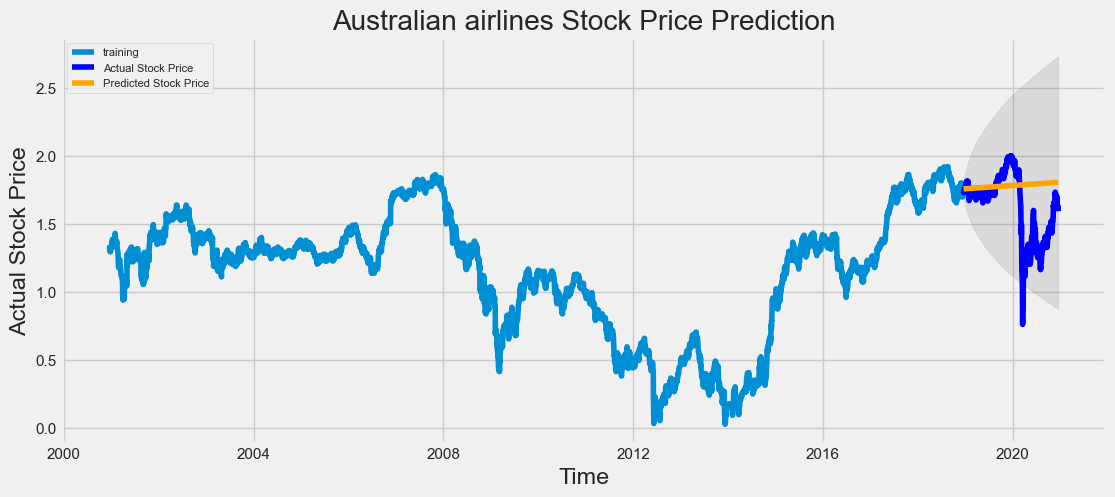

In [43]:
# Forecast
fc, se, conf = fitted.forecast(507, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Australian airlines Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [44]:
# report performance
r_squared=r2_score(test_data, fc)
print('R_SQUARED: '+str(r_squared))
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

R_SQUARED: -0.44692420245848075
MSE: 0.08720704431326619
MAE: 0.21260686420272631
RMSE: 0.2953083884911944
MAPE: 0.15502540894148703


# GERMAN

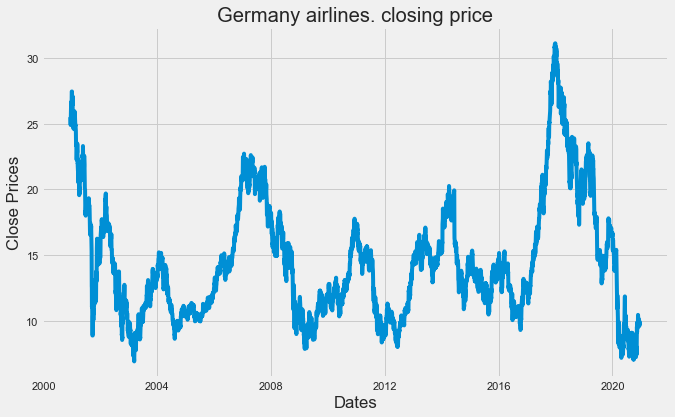

In [45]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(Germany['Close'])
plt.title('Germany airlines. closing price')
plt.show()

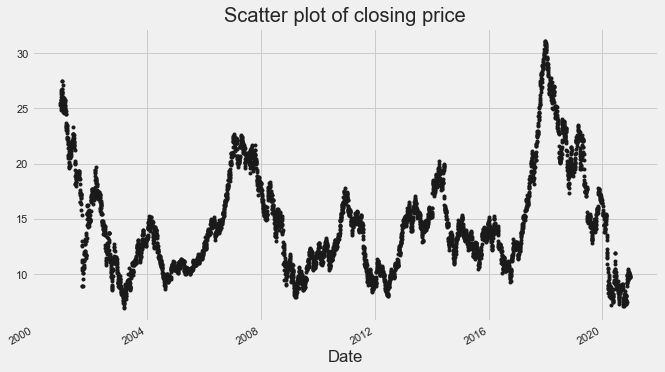

In [46]:
df_close = Germany['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

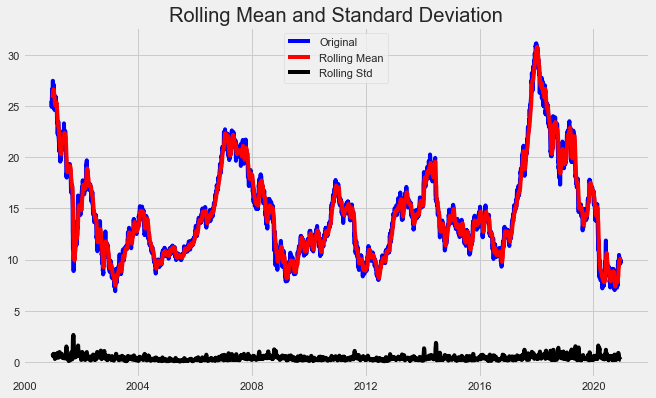

Results of dickey fuller test
Test Statistics                  -2.950547
p-value                           0.039778
No. of lags used                  1.000000
Number of observations used    5114.000000
critical value (1%)              -3.431629
critical value (5%)              -2.862105
critical value (10%)             -2.567071
dtype: float64


In [47]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

 - p-value is less than 0.05 so we  reject the Null hypothesis. 
- Also, the test statistics is less than the critical values. so the data is stationary.

No handles with labels found to put in legend.


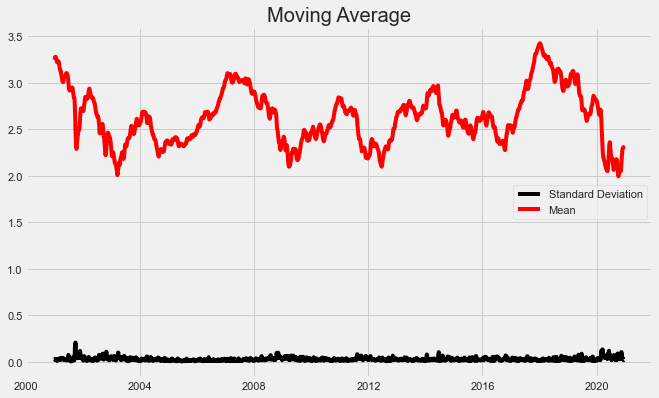

In [48]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

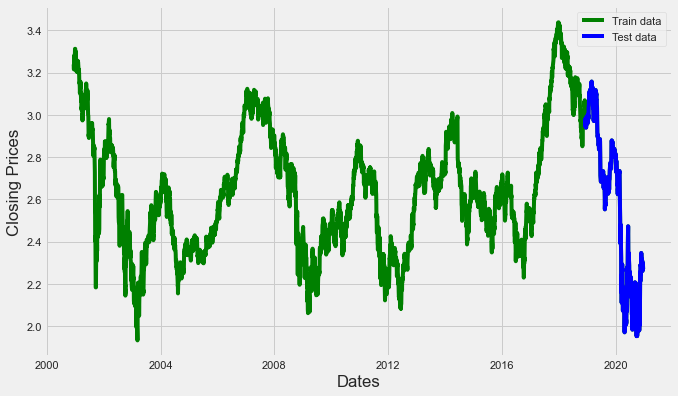

In [49]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [50]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-22299.780, Time=0.52 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-22307.294, Time=1.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-22307.001, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-22301.756, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-22306.190, Time=1.57 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-22305.752, Time=1.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-22304.242, Time=2.49 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-22309.272, Time=0.68 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-22308.169, Time=0.98 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-22307.731, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-22308.980, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-22306.221, Time=1.45 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 11.427 seconds
                               SARIMAX Results                 

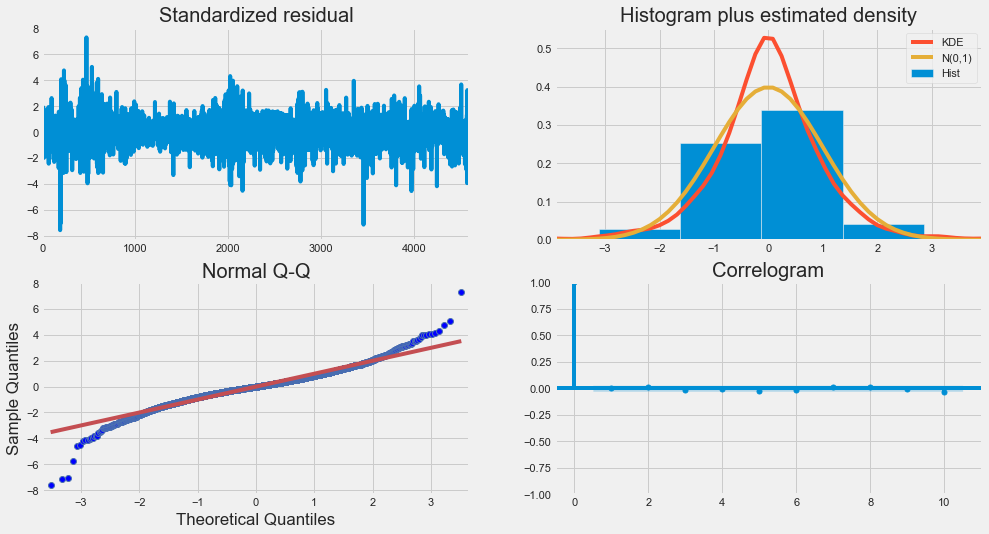

In [51]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [52]:
model = ARIMA(train_data, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4600
Model:                 ARIMA(0, 1, 0)   Log Likelihood               11151.890
Method:                           css   S.D. of innovations              0.021
Date:                Sun, 10 Jan 2021   AIC                         -22299.780
Time:                        15:39:04   BIC                         -22286.912
Sample:                             1   HQIC                        -22295.251
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.884e-05      0.000     -0.155      0.877      -0.001       0.001


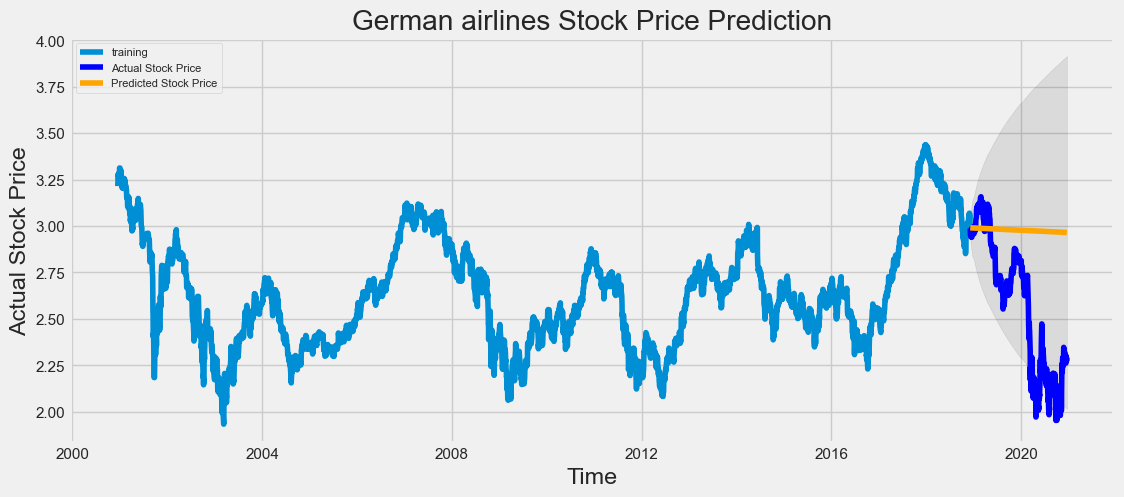

In [54]:
# Forecast
# Forecast
fc, se, conf = fitted.forecast(512, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('German airlines Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [55]:
# report performance
r_squared=r2_score(test_data, fc)
print('R_SQUARED: '+str(r_squared))
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

R_SQUARED: -1.2247137127080334
MSE: 0.2896828778082391
MAE: 0.4313395101973041
RMSE: 0.5382219596116821
MAPE: 0.18954735755087712


In [60]:
from pmdarima.arima.utils import ndiffs
y = Germany.Close

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

1